# Image compression through Singular Value Decomposition


Load a picture as a 3-dimensional `np.array`


In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [8, 8]

# write here the import path of the image
image_path = "./TarantulaNebula.jpg"

A = imread(image_path)

Visualize the picture


(np.float64(-0.5), np.float64(629.5), np.float64(566.5), np.float64(-0.5))

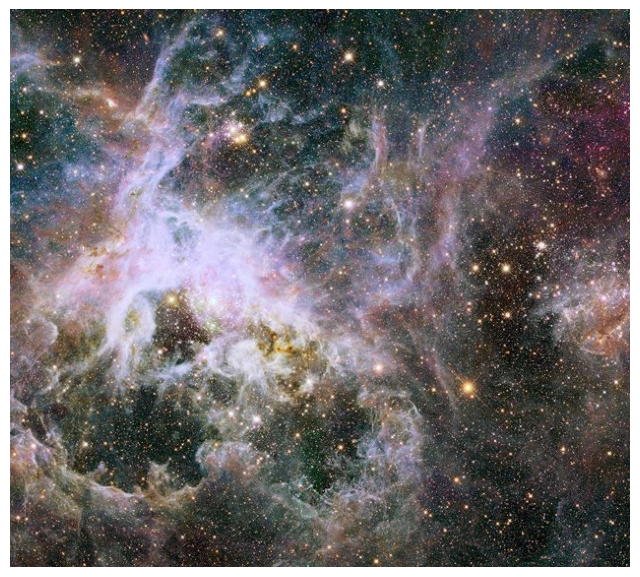

In [2]:
img = plt.imshow(A)
plt.axis("off")

Convert the picture to gray-scale and visualize it.


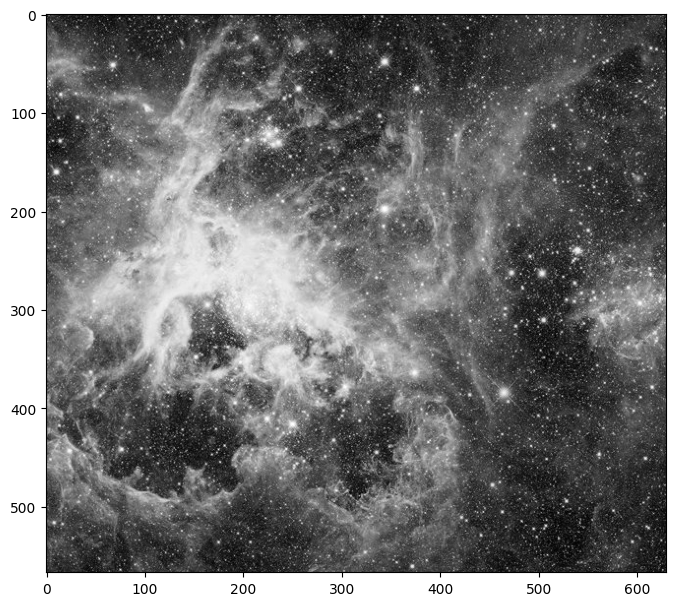

In [3]:
X = A.mean(axis=2)
plt.imshow(X, cmap="gray")

What is the picture size?


In [4]:
X.shape

(567, 630)

Perform the SVD decomposition


In [5]:
U, s, VT = np.linalg.svd(X, full_matrices=False)
U.shape, s.shape, VT.shape

((567, 567), (567,), (567, 630))

Plot the trend of

- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$


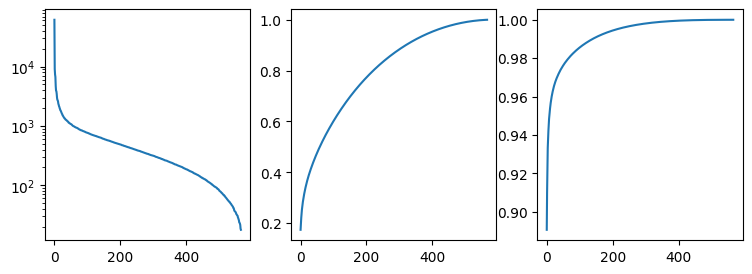

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(9, 3))
ax[0].semilogy(s)
ax[1].plot(np.cumsum(s) / np.sum(s))
ax[2].plot(np.cumsum(s**2) / np.sum(s**2))

Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500


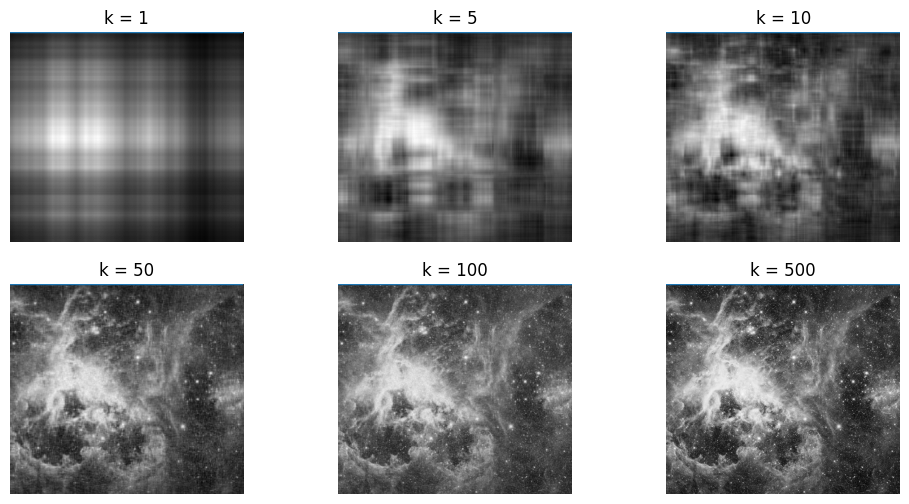

In [17]:
ks = [1, 5, 10, 50, 100, 500]
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.reshape((-1,))
for i, k in enumerate(ks):
    X_k = U[:, :k] @ np.diag(s[:k]) @ VT[:k, :]
    axs[i].imshow(X_k, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = " + str(k))
    axs[i].plot(VT[i, :])

Visualize the $k$-th rank-1 matrix, for $k$ = 1,2,...,6


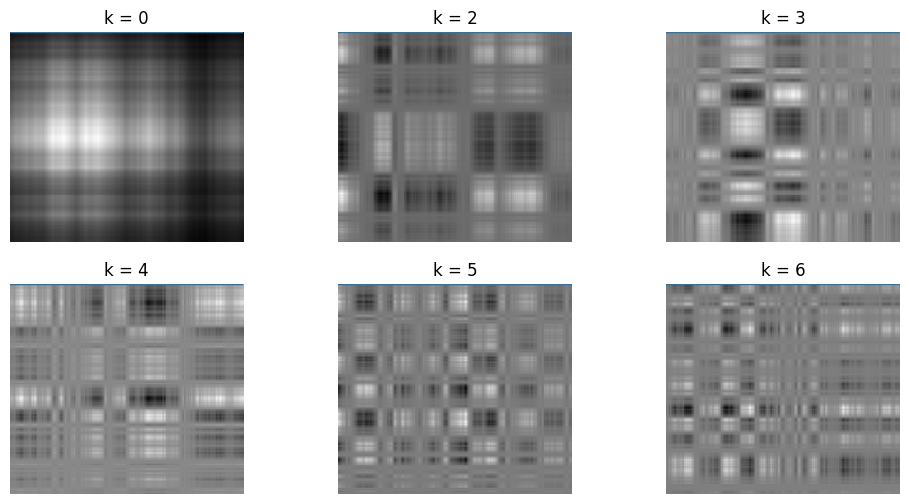

In [23]:
ks = [0, 2, 3, 4, 5, 6]
fig, axs = plt.subplots(2, 3, figsize=(12, 6))
axs = axs.reshape((-1,))
for i, k in enumerate(ks):
    ukvk = np.outer(U[:, k], VT[k, :])
    axs[i].imshow(ukvk, cmap="gray")
    axs[i].axis("off")
    axs[i].set_title("k = " + str(k))
    axs[i].plot(VT[i, :])

In [25]:
U.shape

(567, 567)